**Análisis de series de tiempo**

**Paso 1:**

Explora tus datos de Precipitación los últimos años 1990- fin de datos.


*   Grafica todo el rango de datos utilizando la función df.plot()
*   Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos. 
*   Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot()



In [1]:
#importamos las bibliotecas que usaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
url = 'https://raw.githubusercontent.com/RaulACortez/FisicaComputacional1/main/FisicaComputacional1/Actividad1/ClimatologiaDiariaSantaAna.txt'

my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# convertimos los valores de las variables ambientales a números flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una copia
df_work2 = df_work1.copy()

df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Agregamos las columnas "Año" y "Mes"
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_datos = df_work2.copy()
df_datos.info()
print(df_datos.head())
print(df_datos.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   10772 non-null  datetime64[ns]
 1   Precip  10770 non-null  float64       
 2   Evap    8143 non-null   float64       
 3   Tmax    10708 non-null  float64       
 4   Tmin    10747 non-null  float64       
 5   Año     10772 non-null  int64         
 6   Mes     10772 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 589.2+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1969-01-02     0.0   NaN  22.0   2.0  1969  Jan
1 1969-01-03     0.0   NaN  17.0   2.0  1969  Jan
2 1969-01-04     0.0   NaN  15.0   3.0  1969  Jan
3 1969-01-06     0.0   NaN  19.0   1.0  1969  Jan
4 1969-01-07     0.0   NaN   NaN   0.0  1969  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
10767 2016-04-26     0.0   NaN  23.0  13.0  2016  Apr
10768

Creamos una serie de tiempo con la variable Fecha como el nuevo indice del Dataframe.

In [7]:
df_datos_ts = df_datos.copy()

df_datos_ts = df_datos_ts.set_index('Fecha')

df_datos_ts.info()
print(df_datos_ts.head())
print(df_datos_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10772 entries, 1969-01-02 to 2016-04-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  10770 non-null  float64
 1   Evap    8143 non-null   float64
 2   Tmax    10708 non-null  float64
 3   Tmin    10747 non-null  float64
 4   Año     10772 non-null  int64  
 5   Mes     10772 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 589.1+ KB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1969-01-02     0.0   NaN  22.0   2.0  1969  Jan
1969-01-03     0.0   NaN  17.0   2.0  1969  Jan
1969-01-04     0.0   NaN  15.0   3.0  1969  Jan
1969-01-06     0.0   NaN  19.0   1.0  1969  Jan
1969-01-07     0.0   NaN   NaN   0.0  1969  Jan
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
2016-04-26     0.0   NaN  23.0  13.0  2016  Apr
2016-04-27     0.0   NaN  22.0  11.

seleccionamos un conjunto de años de 30

In [23]:
df_69 = df_datos_ts[(df_datos_ts['Año'] >= 1969) & (df_datos_ts['Año'] < 1986)]
df_86 = df_datos_ts[(df_datos_ts['Año'] >= 1986) & (df_datos_ts['Año'] < 2017)]
df_86.head()

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1987-11-19,1.0,NaN,24.0,8.0,1987,Nov
1987-11-20,0.0,NaN,24.0,5.0,1987,Nov
1987-11-21,0.0,NaN,24.0,6.0,1987,Nov
1987-11-22,0.0,NaN,27.0,10.0,1987,Nov
1987-11-23,0.0,NaN,27.0,3.0,1987,Nov


Visualizamos la colección y verificamos si hay datos faltantes

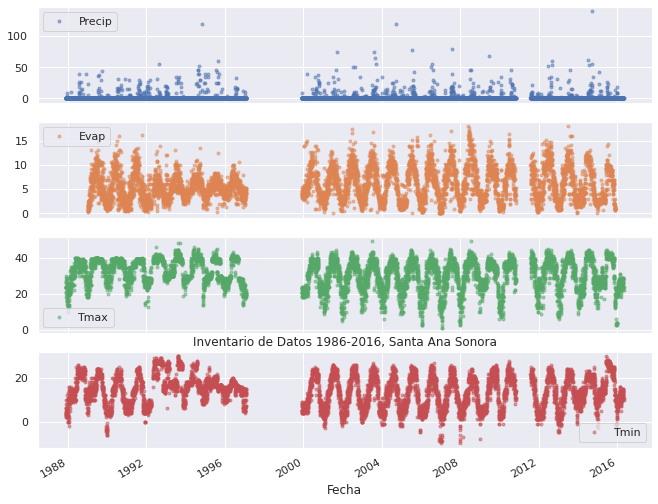

In [24]:
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_86[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1986-2016, Santa Ana Sonora');

Ahora lo verificamos para df.69


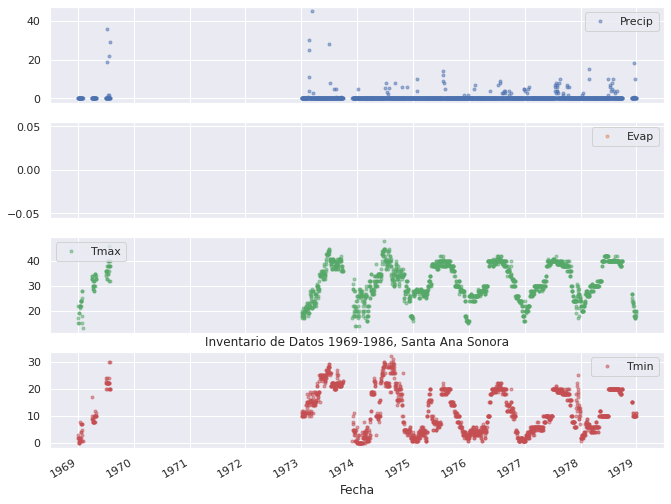

In [25]:
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_69[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1969-1986, Santa Ana Sonora');

Graficamos la precipitación de los ultimos 30 años

Variación en Precipitación promedio 86-69 : 0.5963278515126997


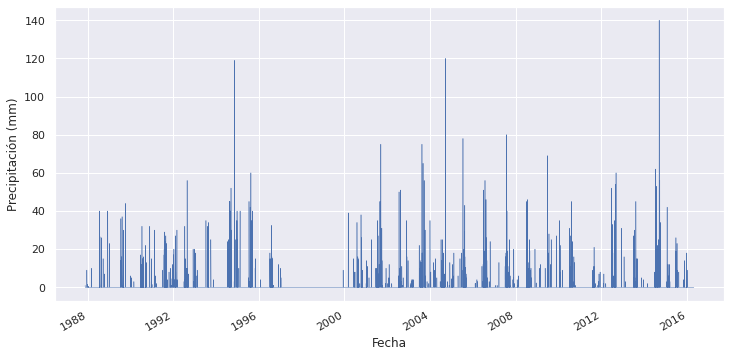

In [26]:
sns.set(rc={'figure.figsize':(12, 6)})

Precip_ave_86 = df_86.Precip.mean()
Precip_ave_69 = df_69.Precip.mean()

# Graficamos la precipitación de la epoca 86 a la actualidad
df_86['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');

# Calculamos diferencia de los promedios de precipitación
print('Variación en Precipitación promedio 86-69 :', Precip_ave_86-Precip_ave_69)

Grafica de precipitacion de los ultimos 30 años

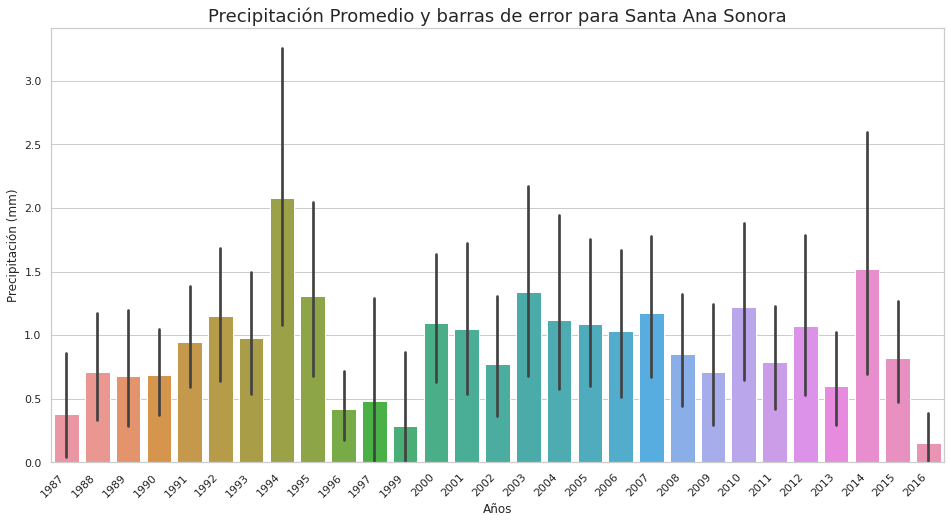

In [27]:
sns.set_style('whitegrid')

# Tamaño de la gráfica
plt.figure(figsize=(16,8))

# Graficamos 30 años de datos usando la columna 'Año' en el eje x
g =sns.barplot(x='Año', y='Precip', data=df_86);

# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Santa Ana Sonora', fontsize=18)

plt.show()

Graficamos la temperatura maxima de los ultimos 30 años

Variación ºC Tmax promedio 86-69 : -0.6721503621771099


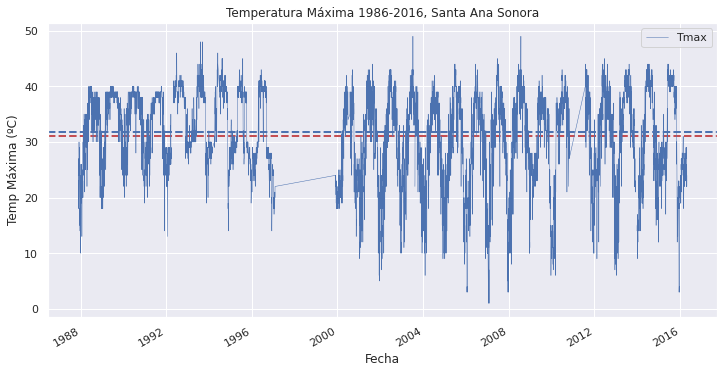

In [28]:
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedios
Tmax_ave_86 = df_86.Tmax.mean()
Tmax_ave_69 = df_69.Tmax.mean()

# Graficar líneas promedios (rojo 1986-2016, azul 1969-1986)
plt.axhline(Tmax_ave_86, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_69, color = 'b', linestyle='--', linewidth=2);

# Graficar la Temperatura
df_86['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
plt.title('Temperatura Máxima 1986-2016, Santa Ana Sonora')

plt.legend();

# Imprime la diferencia de Temperaturas promedio entre épocas 
print('Variación ºC Tmax promedio 86-69 :', Tmax_ave_86-Tmax_ave_69)

Hacemos lo mismo para la temperatura minima

Variación ºC Tmin promedio 86-69 : 1.9106089478709993


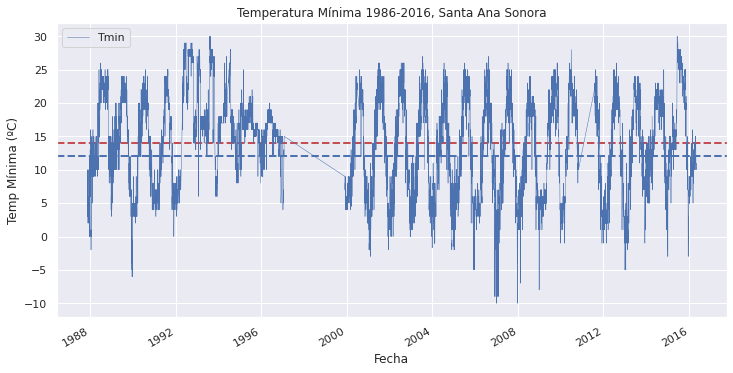

In [29]:
sns.set(rc={'figure.figsize':(12, 6)})

Tmin_ave_86 = df_86.Tmin.mean()
Tmin_ave_69 = df_69.Tmin.mean()

plt.axhline(Tmin_ave_86, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_69, color = 'b', linestyle='--', linewidth=2);

df_86['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
plt.title('Temperatura Mínima 1986-2016, Santa Ana Sonora')

plt.legend();

print('Variación ºC Tmin promedio 86-69 :', Tmin_ave_86-Tmin_ave_69)

Investigando un año de datos, usando la función df.loc() para filtrar un periodo

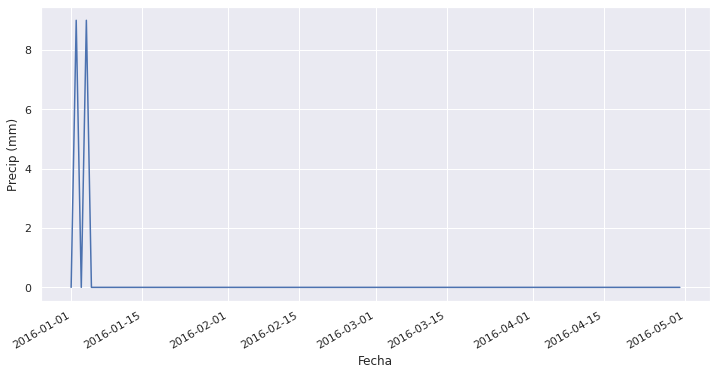

In [31]:
ax = df_86.loc['2016', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

Investigando un periodo de datos con df.loc()

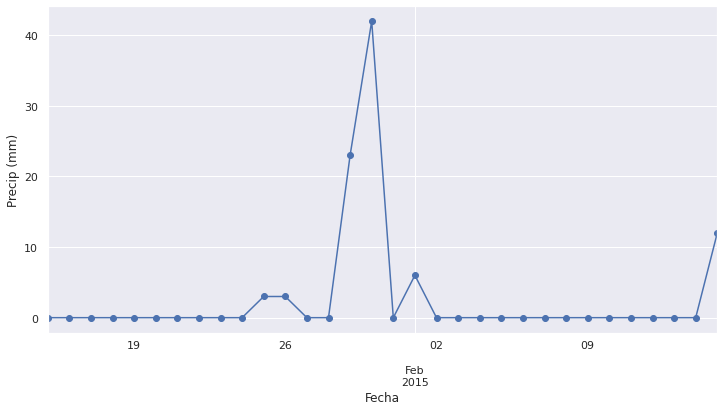

In [36]:
ax = df_86.loc['2015-01-15':'2015-02-15', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

Investigando un rango de dato

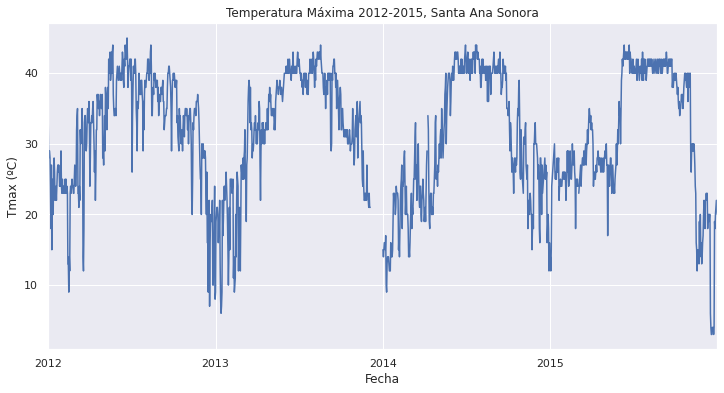

In [37]:
sns.set(rc={'figure.figsize':(12, 6)})

ax = df_86.loc['2012':'2015', 'Tmax'].plot()
ax.set_ylabel('Tmax (ºC)');
ax.set_title('Temperatura Máxima 2012-2015, Santa Ana Sonora');

Suavisando la curva mediante promedios moviles

In [38]:
data_cols = ['Evap', 'Tmax', 'Tmin']
df_86_7d = df_86[data_cols].rolling(7, center=True).mean()
df_86_30d = df_86[data_cols].rolling(30, center=True).mean()
df_86_365d = df_86[data_cols].rolling(365, center=True).mean()

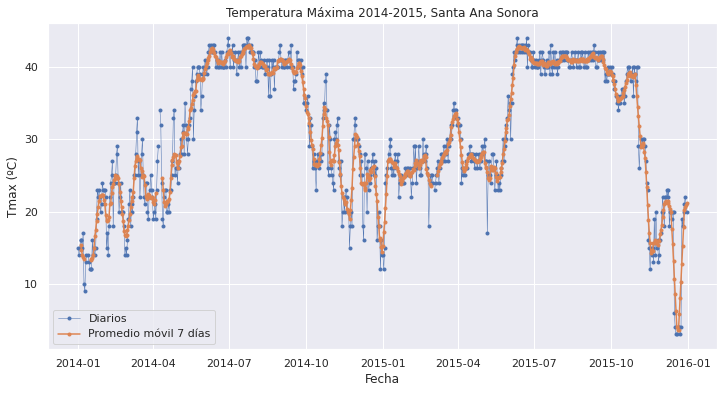

In [40]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2014-01', '2015-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_86.loc[start:end, 'Tmax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_86_7d.loc[start:end, 'Tmax'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2014-2015, Santa Ana Sonora')
ax.legend();

Misma gráfica anterior pero sin marcadores '.'

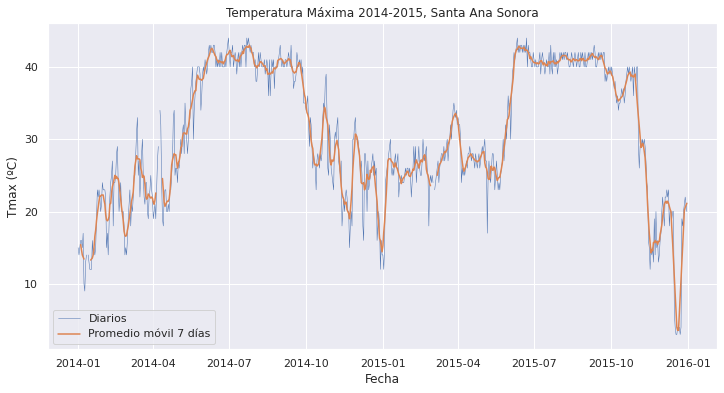

In [41]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2014-01', '2015-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_86.loc[start:end, 'Tmax'],
linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_86_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2014-2015, Santa Ana Sonora')
ax.legend();

Tendencias año con año

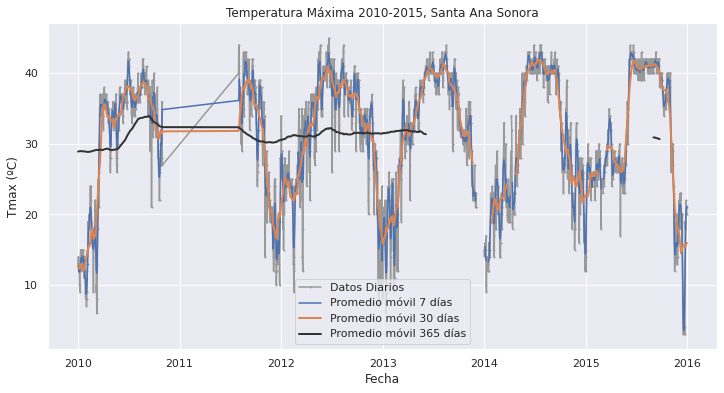

In [43]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2010-01', '2015-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_86.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_86_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_86_30d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_86_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2010-2015, Santa Ana Sonora')
ax.legend();

Tendencias año con año para temperatura minima

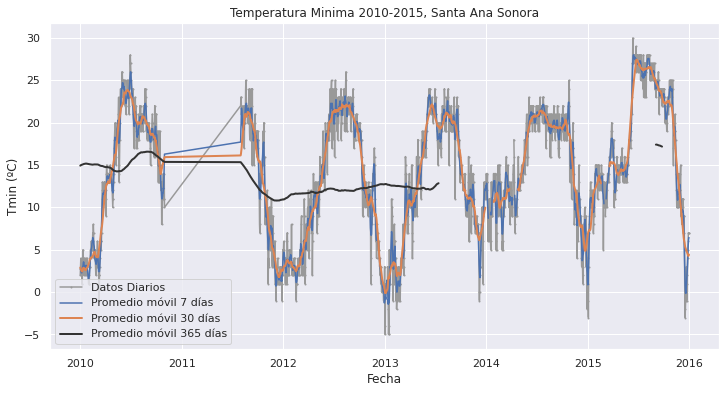

In [44]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2010-01', '2015-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_86.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_86_7d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_86_30d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_86_365d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Minima 2010-2015, Santa Ana Sonora')
ax.legend();

Graficas de promedios móviles de 365 días para las variables de las Temperaturas 

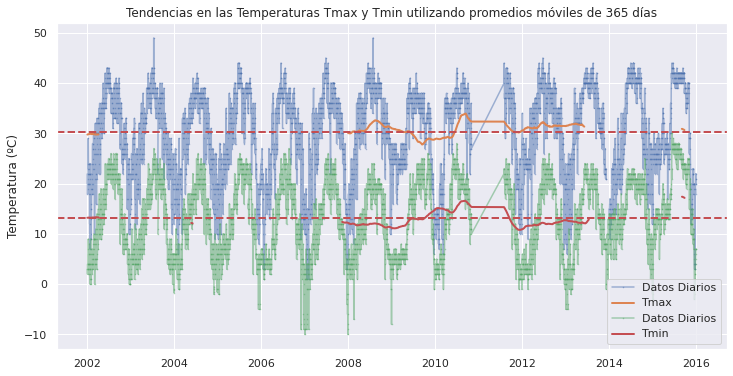

In [46]:
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2002-01', '2015-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_86.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_86_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_86.loc[start:end, nm].mean(), color = 'r', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

Graficas de Temperaturas Tmax, Tmin y Promedios 

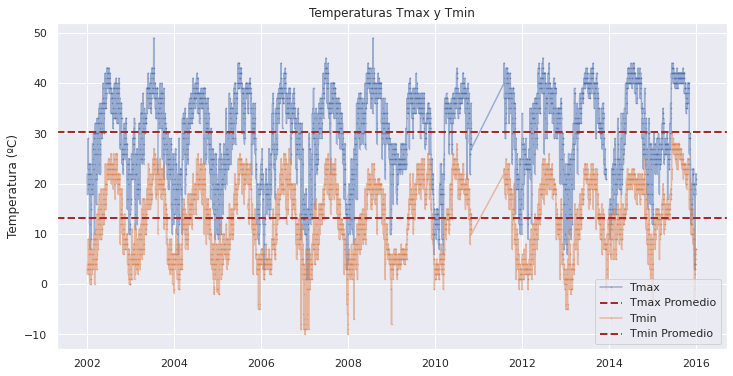

In [47]:
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2002-01', '2015-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_86.loc[start:end, nm], marker='.', markersize=1, linestyle='-', 
            alpha=0.5, label=nm)
    plt.axhline(df_86.loc[start:end, nm].mean(), color='brown', linestyle='--', 
                linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Temperaturas Tmax y Tmin');

In [48]:
df_86_365d.info()
print(df_86_365d.head(185))
print(df_86_365d.tail(185))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8958 entries, 1987-11-19 to 2016-04-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Evap    491 non-null    float64
 1   Tmax    4251 non-null   float64
 2   Tmin    5386 non-null   float64
dtypes: float64(3)
memory usage: 599.9 KB
            Evap       Tmax       Tmin
Fecha                                 
1987-11-19   NaN        NaN        NaN
1987-11-20   NaN        NaN        NaN
1987-11-21   NaN        NaN        NaN
1987-11-22   NaN        NaN        NaN
1987-11-23   NaN        NaN        NaN
...          ...        ...        ...
1988-05-17   NaN        NaN        NaN
1988-05-18   NaN        NaN        NaN
1988-05-19   NaN  31.238356  15.216438
1988-05-20   NaN  31.249315  15.224658
1988-05-21   NaN  31.260274  15.238356

[185 rows x 3 columns]
            Evap  Tmax  Tmin
Fecha                       
2015-10-24   NaN   NaN   NaN
2015-10-25   NaN   NaN   NaN
20

Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.

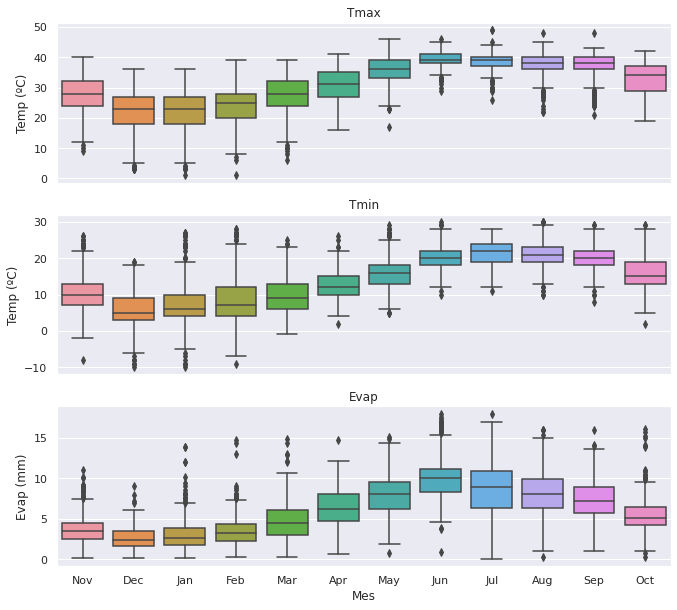

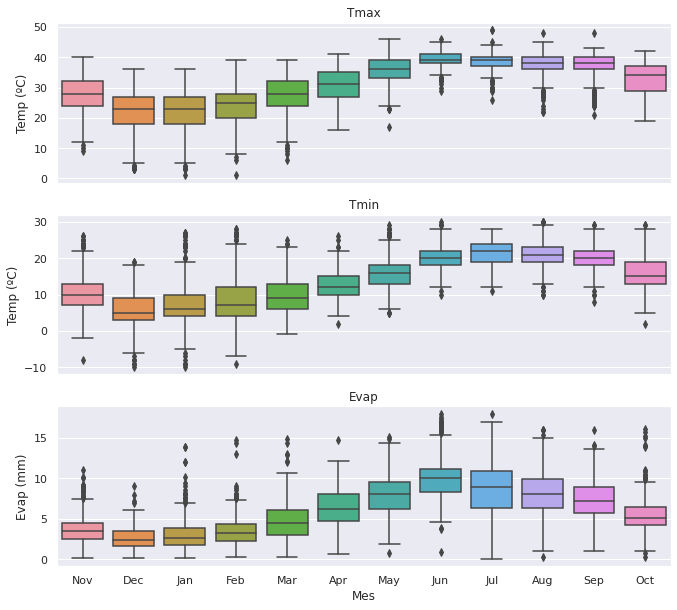

In [50]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_86, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')